No consensus reached within max steps.


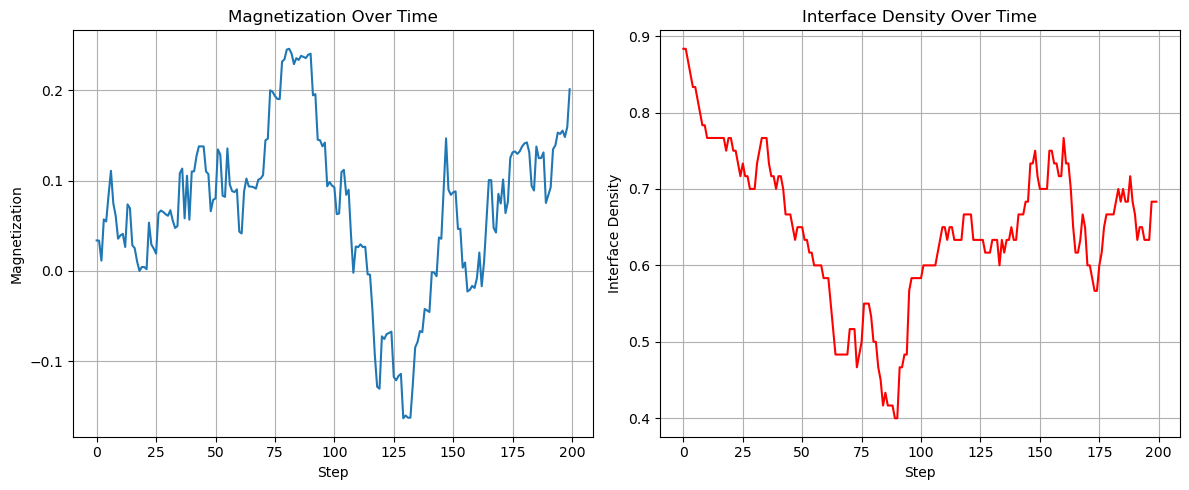

Saving animation to voter_model_simulation.mkv


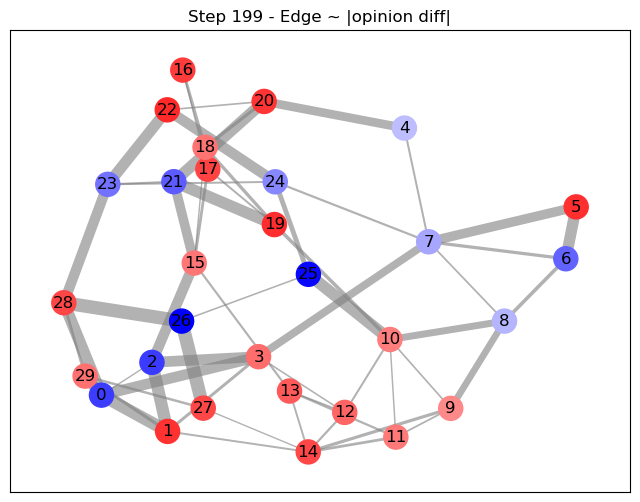

In [1]:
import numpy as np

def initialize_opinions(N_agents):
    return np.random.choice([-1, 1], size=N_agents)

def random_connection_matrix(N_agents, p):
    matrix = np.random.rand(N_agents, N_agents)
    matrix = (matrix < p).astype(int)
    np.fill_diagonal(matrix, 0)
    matrix = np.triu(matrix, 1)
    matrix += matrix.T
    return matrix

def voter_interaction(opinions, connection_matrix):
    N = len(opinions)
    while True:
        i = np.random.randint(N)
        neighbors = np.where(connection_matrix[i] == 1)[0]
        if len(neighbors) > 0:
            j = np.random.choice(neighbors)
            opinions[i] = opinions[j]
            break
    return opinions

if __name__ == '__main__':
    N_agents       = 50
    N_interactions = 1000
    p_con          = 0.3
    opinions       = initialize_opinions(N_agents)
    con_matrix     = random_connection_matrix(N_agents, p_con)

    for _ in range(N_interactions):
        opinions = voter_interaction(opinions, con_matrix)

    print("Final opinions:", opinions)
    print("Number of +1 opinions:", np.sum(opinions == 1))
    print("Number of -1 opinions:", np.sum(opinions == -1))


In [31]:
def average_magnetization(opinions):
    return np.mean(opinions)

In [32]:
def interface_density(opinions, connection_matrix):
    N = len(opinions)
    interfaces = 0
    total_edges = 0
    for i in range(N):
        for j in range(i+1, N):
            if connection_matrix[i][j] == 1:
                total_edges += 1
                if opinions[i] != opinions[j]:
                    interfaces += 1
    return interfaces / total_edges if total_edges > 0 else 0

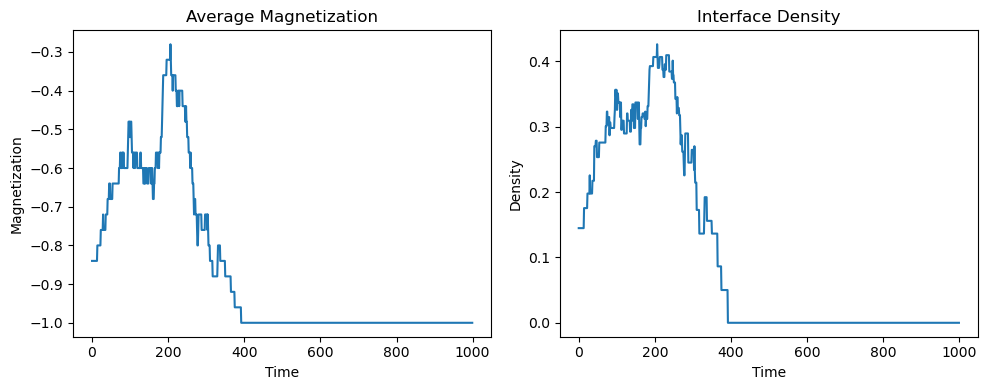

In [33]:
import matplotlib.pyplot as plt

# After your simulation loop
magnetization_list = []
interface_list = []

for _ in range(N_interactions):
    opinions = voter_interaction(opinions, con_matrix)
    magnetization_list.append(average_magnetization(opinions))
    interface_list.append(interface_density(opinions, con_matrix))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(magnetization_list)
plt.title("Average Magnetization")
plt.xlabel("Time")
plt.ylabel("Magnetization")

plt.subplot(1, 2, 2)
plt.plot(interface_list)
plt.title("Interface Density")
plt.xlabel("Time")
plt.ylabel("Density")

plt.tight_layout()
plt.show()
